<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/ArabidopsisFAAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Replace 'your-file.csv' with your actual file path
file_path = '/content/drive/My Drive/CPSC541/Fall2024/Public/ArabidopsisFAAs.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


,FID,IID,ala,arg,asp,gln,glu,gly,his,ile,...,lys,met,phe,pro,ser,thr,trp,tyr,val,Total
0,AtRegMap,6911,0.921413,1.038291,NaN,2.173042,1.098548,0.753047,3.935519,1.375466,...,2.510476,0.769337,1.036050,-1.037167,-0.032452,0.806368,0.871063,0.760870,1.189714,0.227618
1,AtRegMap,126,1.037377,1.094559,1.148481,2.405929,1.087352,0.827303,4.064795,1.499667,...,2.614253,0.761577,1.036635,-1.442937,-0.148576,0.758386,0.894489,0.742909,1.297623,0.256062
2,AtRegMap,8323,1.039818,1.015439,1.121777,2.137448,1.089259,0.739376,3.854021,1.251738,...,2.318302,0.824087,1.027972,-1.143050,0.097380,0.800357,0.869364,0.763795,1.147919,0.242245
3,AtRegMap,6932,1.061223,NaN,1.109104,2.303847,1.094831,0.714998,3.506777,1.336352,...,2.405698,0.841715,1.031585,-0.880028,0.061057,0.761195,0.907860,0.773125,1.247382,0.239451
4,AtRegMap,8365,1.110620,1.066198,1.152403,2.491220,1.094461,0.731903,4.629195,1.375649,...,2.714834,0.814395,1.028737,-1.124269,-0.125687,0.751212,0.896938,0.753940,1.208407,0.248345


In [5]:
import statsmodels.api as sm

# Assuming 'faa.hg' is your pandas DataFrame containing the data
# Define the dependent (his) and independent variable (gly)
X = data['gly']
y = data['his']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(y, X)
results = model.fit()

# Summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    his   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.54e-21
Time:                        19:49:10   Log-Likelihood:                -227.95
No. Observations:                 312   AIC:                             459.9
Df Residuals:                     310   BIC:                             467.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2391      0.333     24.726      0.0

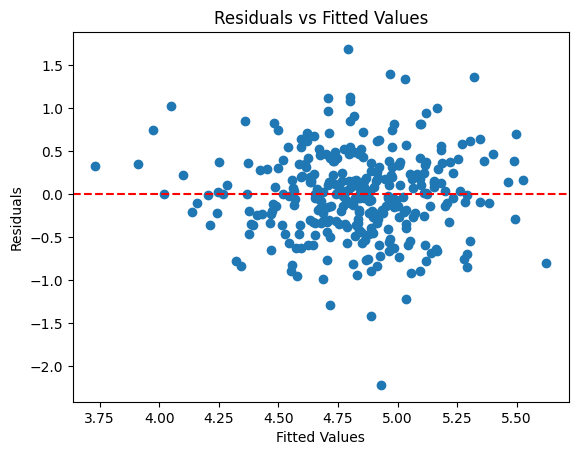

In [6]:
import matplotlib.pyplot as plt

fitted_values = results.fittedvalues
residuals = results.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


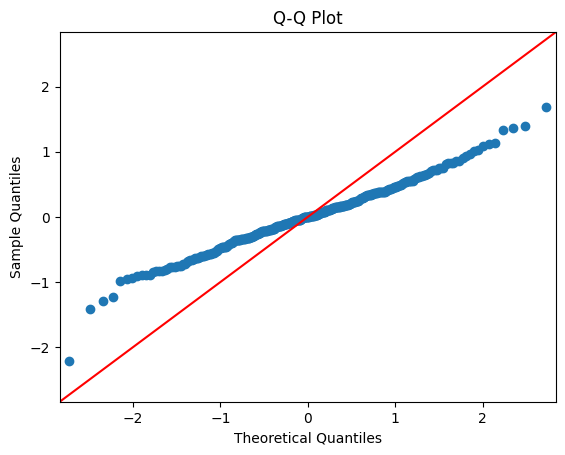

In [7]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()


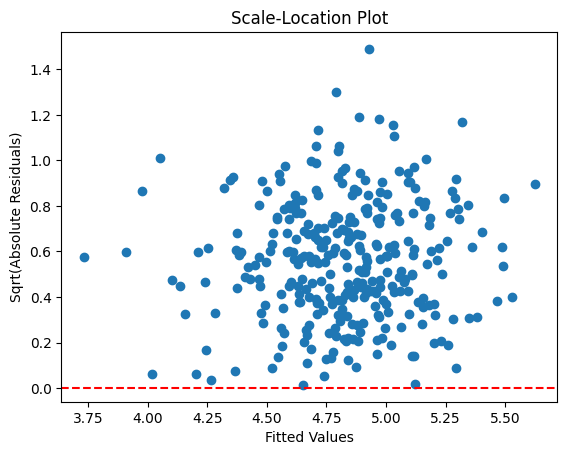

In [8]:
import numpy as np

sqrt_residuals = np.sqrt(np.abs(residuals))

plt.scatter(fitted_values, sqrt_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Absolute Residuals)')
plt.title('Scale-Location Plot')
plt.show()


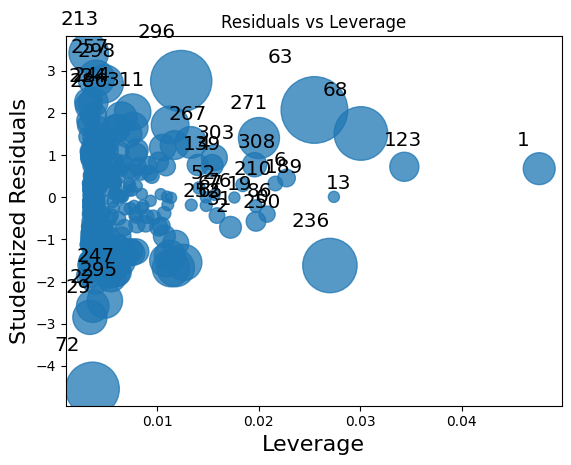

In [9]:
sm.graphics.influence_plot(results)
plt.title('Residuals vs Leverage')
plt.show()


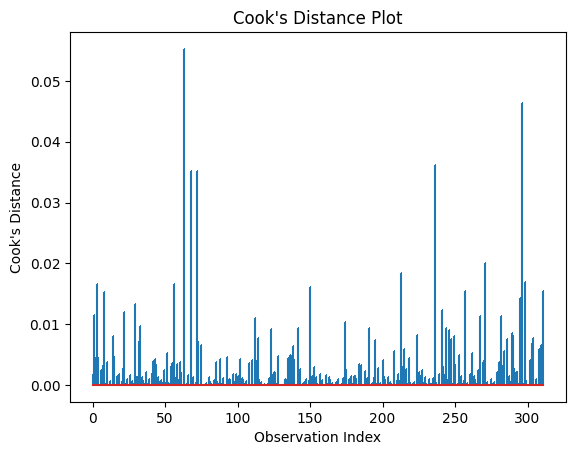

In [10]:
influence = results.get_influence()
cooks_d = influence.cooks_distance[0]

plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


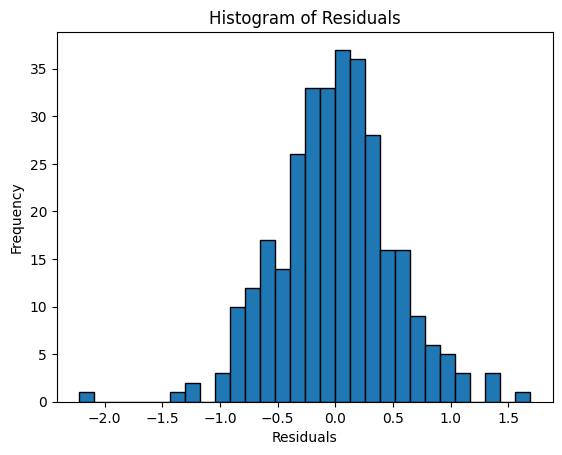

In [11]:
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


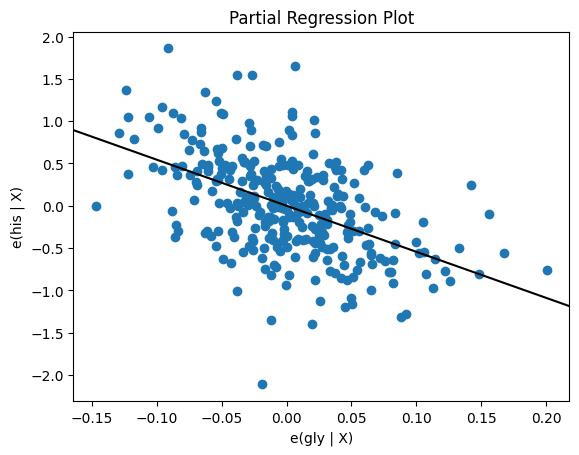

In [13]:
sm.graphics.plot_partregress('his', 'gly', [], data=data, obs_labels=False)
plt.show()
